<a href="https://colab.research.google.com/github/CivitCihan/MachineLearning/blob/main/CART.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/Hitters.csv'

df = pd.read_csv(file_path)
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [ ]:
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=45)

In [ ]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [ ]:
cart_model = DecisionTreeRegressor().fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


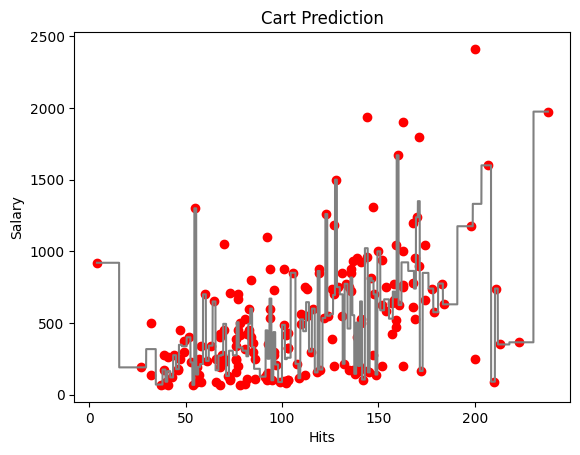

In [ ]:
x_grid = np.arange(min(np.ravel(X_train)), max(np.ravel(X_train)), 0.01)
x_grid = x_grid.reshape((len(x_grid), 1))

plt.scatter(X_train, y_train, color="red")
plt.plot(x_grid, cart_model.predict(x_grid), color="gray")

plt.title('Cart Prediction')
plt.xlabel('Hits')
plt.ylabel('Salary')
plt.show()

In [ ]:
cart_model2 = DecisionTreeRegressor(max_leaf_nodes = 7).fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


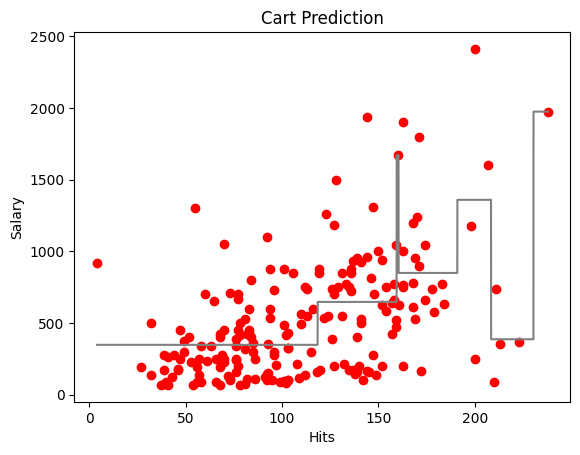

In [ ]:
x_grid = np.arange(min(np.ravel(X_train)), max(np.ravel(X_train)), 0.01)
x_grid = x_grid.reshape((len(x_grid), 1))

plt.scatter(X_train, y_train, color="red")
plt.plot(x_grid, cart_model2.predict(x_grid), color="gray")

plt.title('Cart Prediction')
plt.xlabel('Hits')
plt.ylabel('Salary')
plt.show()

In [ ]:
y_pred2 = cart_model2.predict(X_test)

In [ ]:
y_pred = cart_model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred2))

495.51680444287035

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

528.298385859339

multi

In [ ]:
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=45)

In [ ]:
cart_model3 = DecisionTreeRegressor().fit(X_train, y_train)

In [ ]:
y_pred3 = cart_model3.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred3))

400.75564416435975

In [ ]:
cart_params = {'max_depth': [2,3,5,10,30],
               "min_samples_split": [2,5,15]}
cart_cv_model = GridSearchCV(cart_model3, cart_params, cv=5).fit(X_train, y_train)

In [ ]:
cart_cv_model.best_params_

{'max_depth': 10, 'min_samples_split': 15}

In [ ]:
cart_model4 = DecisionTreeRegressor(max_depth = 10, min_samples_split = 15).fit(X_train, y_train)

In [ ]:
y_pred3 = cart_model4.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred3))

363.8384013807044